## Business Understanding

Business Understanding

The primary goal of this project is to harness the power of RFM (Recency, Frequency, Monetary) analysis and Behavioral Segmentation to deepen our understanding of customer engagement and loyalty within the retail sector. By analyzing customer transaction data, we aim to identify distinct customer segments that can be targeted with tailored marketing strategies to enhance customer retention and increase overall business revenue.
Objectives:

Identify Valuable Customer Segments: Determine which customers contribute most to revenue based on their purchase behavior and engagement level. This involves analyzing aspects like how recently and frequently they purchase, as well as the monetary value of their transactions.

Enhance Marketing Efficiency: Develop targeted marketing actions that cater to the specific needs and behaviors of different customer segments, thereby maximizing the effectiveness of marketing expenditures.

Increase Customer Retention: Implement strategies aimed at converting one-time buyers into repeat customers, particularly focusing on the most profitable segments.

Drive Business Growth: Utilize insights gained from RFM and Behavioral Segmentation to support strategic business decisions, aiming for higher customer satisfaction and increased sales.

Key Questions:

What are the characteristics of our most loyal and profitable customers?
Which customers are at risk of churn, and what proactive measures can we take to retain them?
How can we optimize our marketing strategies based on the segmentation insights to achieve a higher ROI?

## Data Understanding

### About dataset

**Dataset link**: 
[Online Retail II UCI](https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci)

**Context**:

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

**Content**:

| Attribute    | Description |
|--------------|-------------|
| **InvoiceNo**    | Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. |
| **StockCode**    | Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. |
| **Description** | Product (item) name. Nominal. |
| **Quantity**     | The quantities of each product (item) per transaction. Numeric. |
| **InvoiceDate**  | Invoice date and time. Numeric. The day and time when a transaction was generated. |
| **UnitPrice**    | Unit price. Numeric. Product price per unit in sterling (£). |
| **CustomerID**   | Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. |
| **Country**      | Country name. Nominal. The name of the country where a customer resides. |


In [155]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visualization aesthetics
sns.set_style(style="whitegrid")
plt.style.use("fivethirtyeight")

In [156]:
# Setting the path to the dataset
RAW_DATA_PATH = "data/online_retail_II.csv"

# Loading the dataset into a pandas DataFrame
df = pd.read_csv(RAW_DATA_PATH)

# Displaying the first few rows of the dataset to get an initial look at the data
display(df.head())

# Examining the dataset to understand its structure
# This provides information on the number of non-null entries and data types of each column
display(df.info())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


None

### Numerical Data

In [157]:
# Specifying the numerical features to analyze
NUMERICAL_FEATURES = ["Quantity", "InvoiceDate", "Price"]

# Creating a copy of the dataframe to work with numerical features
new_df = df.copy()

# Displaying the dataframe with only numerical features
print("DATAFRAME WITH NUMERICAL FEATURES")
display(new_df[NUMERICAL_FEATURES].head())

DATAFRAME WITH NUMERICAL FEATURES


,Quantity,InvoiceDate,Price
0,12,2009-12-01 07:45:00,6.95
1,12,2009-12-01 07:45:00,6.75
2,12,2009-12-01 07:45:00,6.75
3,48,2009-12-01 07:45:00,2.10
4,24,2009-12-01 07:45:00,1.25


In [158]:
# Descriptive statistics for Quantity and Price with custom percentiles
print("DESCRIPTIVE STATISTICS FOR QUANTITY AND PRICE")
descriptive_stats = new_df[['Quantity', 'Price']].describe(percentiles=[.01, .1, .25, .5, .75, .90, .95, .99]).T
display(descriptive_stats)

DESCRIPTIVE STATISTICS FOR QUANTITY AND PRICE


,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,1067371.0,9.938898,172.705794,-80995.00,-3.00,1.00,1.00,3.0,10.00,24.00,30.00,100.0,80995.0
Price,1067371.0,4.649388,123.553059,-53594.36,0.21,0.65,1.25,2.1,4.15,7.95,9.95,18.0,38970.0


#### Investigate Quantity & Price
1. Outliers
2. Negative Values  

In [159]:
# Aggregate total sales by StockCode and display the result
total_sales = new_df.groupby("StockCode").agg(TotalSales=("Quantity", "sum")).sort_values(by="TotalSales", ascending=False).T
display(total_sales)

# Identify and display records with negative quantities
negative_quantities = new_df[new_df["Quantity"] < 0]
display(negative_quantities)

# Calculate the total number of records with negative quantities
tot_negative_quantity = len(negative_quantities)

# Identify and count cancelled orders (negative quantities with Invoice starting with 'C')
cancelled_orders = len(new_df[(new_df["Quantity"] < 0) & (new_df["Invoice"].str.startswith('C'))])

# Calculate the proportion of cancelled orders among negative quantities
proportion_cancelled = cancelled_orders / tot_negative_quantity
print(f"Proportion of cancelled orders: {proportion_cancelled:.2f}")

# Identify and count non-cancelled negative quantities (negative quantities with Invoice not starting with 'C')
negative_quantity_not_cancelled = len(new_df[(new_df["Quantity"] < 0) & (~new_df["Invoice"].str.startswith('C'))])

# Calculate the proportion of non-cancelled negative quantities among negative quantities
proportion_not_cancelled = negative_quantity_not_cancelled / tot_negative_quantity
print(f"Proportion of non-cancelled negative quantities: {proportion_not_cancelled:.2f}")

StockCode,84077,85123A,85099B,21212,84879,22197,17003,21977,84991,22492,...,79323W,16235,72024HC,C3,72140F,10120,23003,23005,22126,20852
TotalSales,108545,96066,95739,95450,80705,79363,70700,56575,54366,45384,...,-3050,-3190,-3669,-4999,-5193,-8350,-8516,-14418,-16400,-18800


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Proportion of cancelled orders: 0.85
Proportion of non-cancelled negative quantities: 0.15


After analyzing the data, we found:

1. **Cancelled Orders**:
   - 85% of the negative quantities are from cancelled orders. This makes sense because when items are returned or orders are cancelled, they are logged with negative quantities to reverse the sale.

2. **Non-Cancelled Negative Quantities**:
   - 15% of the negative quantities are not from cancelled orders. These could be due to data entry mistakes or other adjustments. It's important to look into these to understand why they happen.

In [160]:
# Filter the DataFrame to remove rows where Invoice starts with 'C' and Quantity is less than 0
filtered_df = new_df[(new_df["Quantity"] < 0) & (~new_df["Invoice"].str.startswith('C'))]

# Display the first few rows of the filtered DataFrame
display(filtered_df.head())

# Display the information about the filtered DataFrame
display(filtered_df.info())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom


<class 'pandas.core.frame.DataFrame'>
Index: 3457 entries, 263 to 1064386
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      3457 non-null   object 
 1   StockCode    3457 non-null   object 
 2   Description  768 non-null    object 
 3   Quantity     3457 non-null   int64  
 4   InvoiceDate  3457 non-null   object 
 5   Price        3457 non-null   float64
 6   Customer ID  0 non-null      float64
 7   Country      3457 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 243.1+ KB


None

In [161]:
# Customers with total quantities negative
purchased_items_df = new_df.groupby("Customer ID").agg(PurchasedItems=("Quantity", "sum"))
negative_customers = purchased_items_df[purchased_items_df["PurchasedItems"] < 0].index

# Customers who cancelled at least one order and which total quantities are negative
cancelling_customers = new_df[new_df["Invoice"].str.startswith('C')]["Customer ID"].unique()
customer_totals = new_df[new_df["Customer ID"].isin(cancelling_customers)].groupby("Customer ID").agg(PurchasedItems=("Quantity", "sum"))
negative_customers_c = customer_totals[customer_totals["PurchasedItems"] < 0].index

# Check if both sets of customers are the same
set(negative_customers) == set(negative_customers_c)

True

The analysis shows that all customers with negative total quantities have also cancelled orders. This confirms that cancellations are correctly recorded and are the primary cause of negative totals.

In [162]:
# Drop rows for customers with negative total quantities
new_df = new_df[~new_df["Customer ID"].isin(negative_customers)]

# Drop rows where Customer ID is missing
new_df.dropna(subset=["Customer ID"], inplace=True)

#### Investigate InvoiceDate 

In [163]:
# Convert InvoiceDate to datetime format with error handling
new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'], errors='coerce')

# Drop rows where InvoiceDate conversion failed
new_df.dropna(subset=["InvoiceDate"], inplace=True)

# Verify the result after dropping NaT values
print("First few rows of new_df['InvoiceDate'] after dropping NaT values:")
print(new_df['InvoiceDate'].head())

# Print the maximum and minimum InvoiceDate after cleaning
print("Maximum InvoiceDate:")
print(new_df["InvoiceDate"].max())

print("Minimum InvoiceDate:")
print(new_df["InvoiceDate"].min())


First few rows of new_df['InvoiceDate'] after dropping NaT values:
0   2009-12-01 07:45:00
1   2009-12-01 07:45:00
2   2009-12-01 07:45:00
3   2009-12-01 07:45:00
4   2009-12-01 07:45:00
Name: InvoiceDate, dtype: datetime64[ns]
Maximum InvoiceDate:
2011-12-09 12:50:00
Minimum InvoiceDate:
2009-12-01 07:45:00


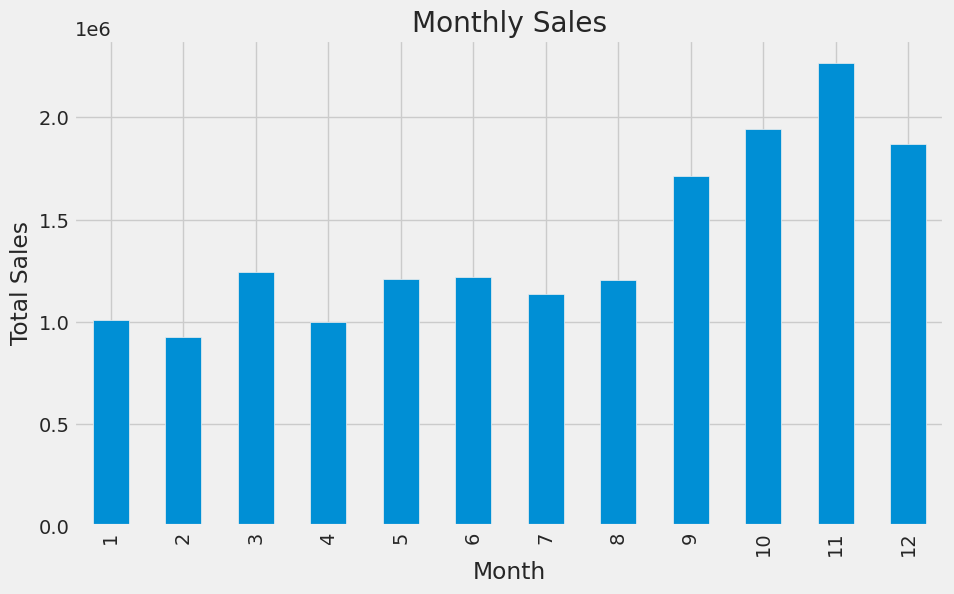

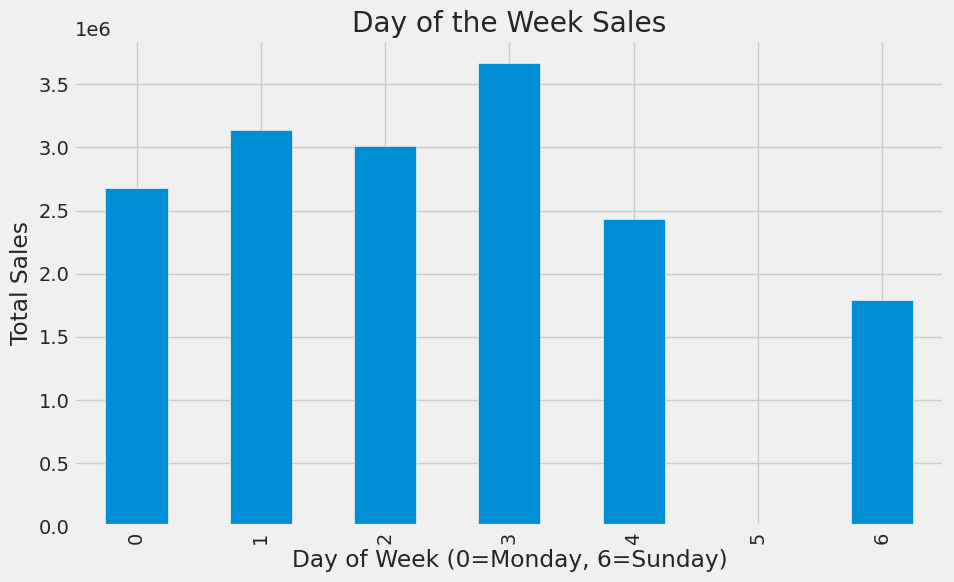

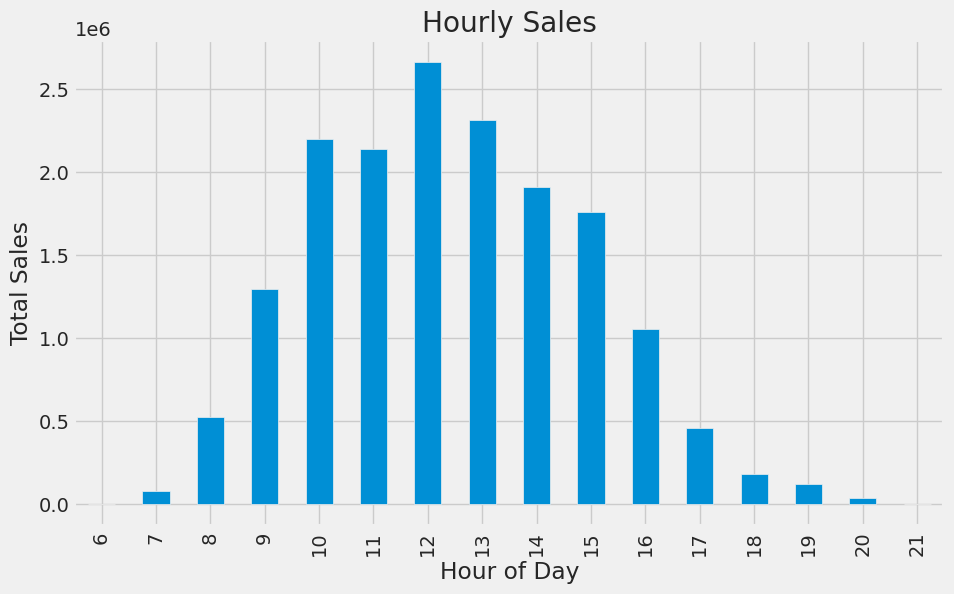

In [164]:
# Step 1: Split the date into components
# This helps in analyzing data based on year, month, day, hour, and day of the week
new_df['Year'] = new_df['InvoiceDate'].dt.year
new_df['Month'] = new_df['InvoiceDate'].dt.month
new_df['Day'] = new_df['InvoiceDate'].dt.day
new_df['Hour'] = new_df['InvoiceDate'].dt.hour
new_df['DayOfWeek'] = new_df['InvoiceDate'].dt.dayofweek

# Step 2: Calculate TotalPrice for each transaction
# This is the total sales value of each transaction
new_df['TotalPrice'] = new_df['Quantity'] * new_df['Price']

# Step 3: Example analysis - Monthly sales
# Group data by Month and sum the TotalPrice to get total sales per month
monthly_sales = new_df.groupby('Month')['TotalPrice'].sum()

# Plotting monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Step 4: Example analysis - Day of the week sales
# Group data by DayOfWeek and sum the TotalPrice to get total sales per day of the week
day_of_week_sales = new_df.groupby('DayOfWeek')['TotalPrice'].sum()

# Plotting day of the week sales
plt.figure(figsize=(10, 6))
day_of_week_sales.plot(kind='bar')
plt.title('Day of the Week Sales')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Total Sales')
plt.show()

# Step 5: Example analysis - Hourly sales
# Group data by Hour and sum the TotalPrice to get total sales per hour of the day
hourly_sales = new_df.groupby('Hour')['TotalPrice'].sum()

# Plotting hourly sales
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='bar')
plt.title('Hourly Sales')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.show()

### Categorical Data

In [165]:
# Define categorical features in the dataset
CATEGORICAL_FEATURES = ["Invoice", "StockCode", "Description", "Customer ID", "Country"]

# Display the first few rows of the specified categorical features
new_df[CATEGORICAL_FEATURES].head()

,Invoice,StockCode,Description,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,13085.0,United Kingdom


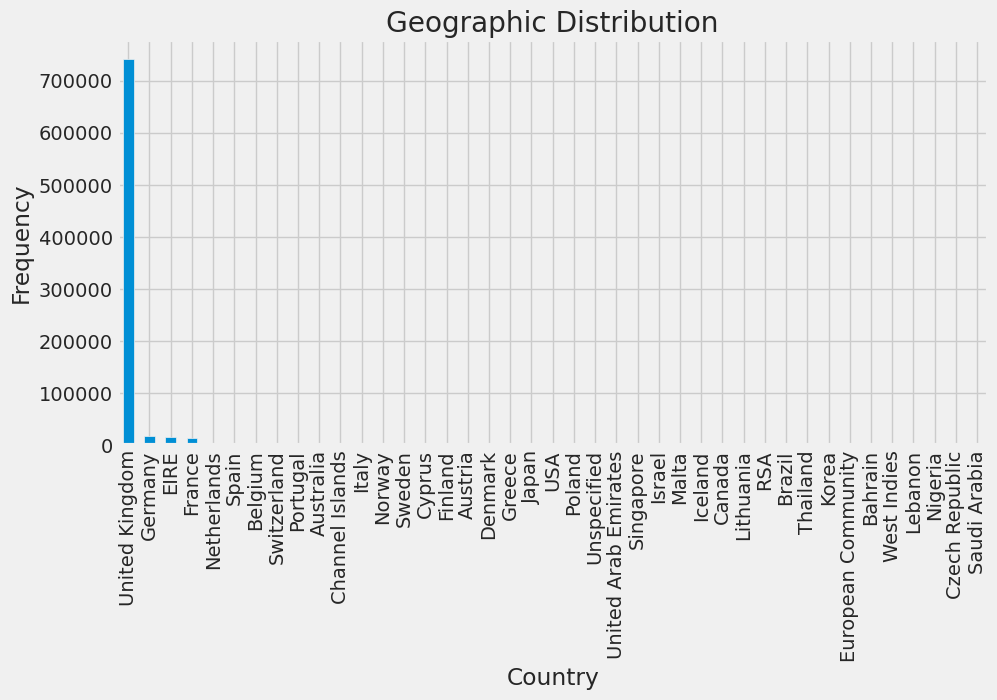

In [166]:
# Count the occurrences of each country in the dataset
country_distribution = new_df['Country'].value_counts()

# Plot the country distribution as a bar chart
plt.figure(figsize=(10, 5))
country_distribution.plot(kind='bar')
plt.title('Geographic Distribution')
plt.xlabel('Country')
plt.ylabel('Frequency')

plt.show()

## Data Preparation

In [167]:
df_clean = df.copy()

# Convert InvoiceDate to datetime format with error handling
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], errors='coerce')

# Print the maximum and minimum InvoiceDate to check the date range
print("Max InvoiceDate:", df_clean["InvoiceDate"].max())  
print("Min InvoiceDate:", df_clean["InvoiceDate"].min())

Max InvoiceDate: 2011-12-09 12:50:00
Min InvoiceDate: 2009-12-01 07:45:00


In [168]:
def preprocess_and_clean_data(df, year=None):
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
    df = df.dropna(subset=['InvoiceDate'])

    if year is not None: 
        start_date = f'{year}-01-01'
        end_date = f'{year}-12-31'
        df = df[(df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] <= end_date)].copy()

    # Step 1: Remove Cancelled Orders
    df = df[~df["Invoice"].str.startswith('C')]

    # Step 2: Drop rows with NaN Customer ID
    df.dropna(subset=["Customer ID"], inplace=True)

    # Step 3: Limit to United Kingdom (if needed)
    df = df[df["Country"] == "United Kingdom"]

    # Step 4: Calculate the 99th percentile for 'Price' and 'Quantity'
    quantity_99 = df["Quantity"].quantile(0.99)
    price_99 = df["Price"].quantile(0.99)
    df = df[(df["Price"] <= price_99) & (df["Quantity"] <= quantity_99)]

    # Calculate Total Sales
    df['TotalPrice'] = df['Quantity'] * df['Price']

    return df

In [169]:
# Preprocess and clean data for the year 2010 and 2011
df_2010_clean = preprocess_and_clean_data(df_clean, 2010)
df_2011_clean = preprocess_and_clean_data(df_clean, 2011)

# Preprocess and clean data for the entire period
df_clean = preprocess_and_clean_data(df)

# Debug: Print cleaned data for the entire period
print("Cleaned Data for the Entire Period:")
display(df_clean.head())

Cleaned Data for the Entire Period:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


Sales Over Time:


InvoiceDate
2009-12-31    493787.820
2010-01-31    316148.302
2010-02-28    344972.706
2010-03-31    470299.381
2010-04-30    430865.361
Freq: ME, Name: TotalPrice, dtype: float64

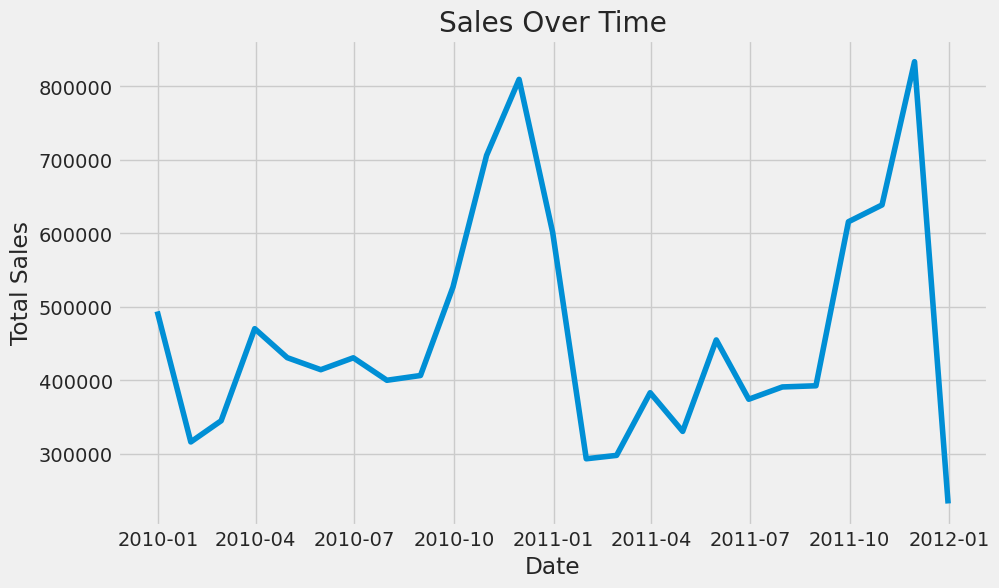

In [170]:
# Resample and sum the data to get sales over time
sales_over_time = df_clean.resample('ME', on='InvoiceDate').sum()['TotalPrice']

# Debug: Print sales over time
print("Sales Over Time:")
display(sales_over_time.head())

# Plotting total sales over time to visualize the patterns
plt.figure(figsize=(10, 6))
plt.plot(sales_over_time.index, sales_over_time.values)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

### RFM
In this section, we compute the RFM (Recency, Frequency, Monetary) values for each customer. RFM analysis is a marketing technique used to evaluate customer behavior and segment customers based on their purchase history.
Steps to Compute RFM Values:

- Recency: The number of days since the customer's last purchase.
- Frequency: The total number of purchases made by the customer.
- Monetary: The total amount of money spent by the customer.

In [171]:
def compute_rfm(df_clean, analysis_date):
    # Convert analysis_date to a date object
    analysis_date = analysis_date.date()
    
    # Group by 'Customer ID' and compute Recency, Frequency, and Monetary values
    rfm = df_clean.groupby('Customer ID').agg({
        'InvoiceDate': lambda x: (analysis_date - x.max().date()).days,  # Recency
        'Invoice': 'count',  # Frequency
        'TotalPrice': 'sum'  # Monetary
    }).reset_index()

    # Rename columns for clarity
    rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']
    return rfm


In [172]:
# Define the analysis date as the last date of each year
analysis_date_2010 = pd.Timestamp('2010-12-31')
analysis_date_2011 = pd.Timestamp('2011-12-31')

# Compute RFM for each cleaned dataset
rfm_2010 = compute_rfm(df_2010_clean, analysis_date_2010)
rfm_2011 = compute_rfm(df_2011_clean, analysis_date_2011)

# Display the RFM DataFrame for each year
print("RFM for 2010:")
display(rfm_2010)
print("\nRFM for 2011:")
display(rfm_2011)

RFM for 2010:


,Customer ID,Recency,Frequency,Monetary
0,12346.0,186,28,259.36
1,12608.0,61,16,415.79
2,12745.0,143,22,723.85
3,12746.0,197,17,254.55
4,12747.0,18,143,4483.60
...,...,...,...,...
3831,18283.0,39,230,641.77
3832,18284.0,88,27,411.68
3833,18285.0,317,10,347.10
3834,18286.0,133,49,818.53



RFM for 2011:


,Customer ID,Recency,Frequency,Monetary
0,12747.0,24,86,3458.84
1,12748.0,22,3869,24890.30
2,12749.0,25,197,4010.98
3,12820.0,25,59,942.34
4,12821.0,236,6,92.72
...,...,...,...,...
3764,18280.0,299,10,180.60
3765,18281.0,202,5,46.92
3766,18282.0,29,12,178.05
3767,18283.0,25,755,2078.93


Describing Statistics for year 2011

In [173]:
# Inspect the RFM table
rfm_2011[['Recency', 'Frequency', 'Monetary']].describe(percentiles=[.01, .1, .25, .5, .75, .90, .95, .99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
Recency,3769.0,106.165561,89.739069,22.0,23.000,27.00,39.0,68.00,150.00,263.000,303.00,345.0000,361.00
Frequency,3769.0,86.088352,206.650780,1.0,1.000,7.00,17.0,39.00,95.00,193.200,293.60,655.9600,7522.00
Monetary,3769.0,1385.752490,3132.854191,2.9,35.272,139.09,270.8,594.24,1431.81,3007.632,4687.19,12028.0532,66253.55


Cleaning the RFM Data

In [174]:
# Filter out customers with more than 28 purchases in the last year (99th percentile)
rfm_2011_clean = rfm_2011.loc[rfm_2011['Frequency'] <= 7522]

# Filter out customers with more than 16,500 in monetary value (99th percentile)
rfm_2011_clean = rfm_2011.loc[rfm_2011['Monetary'] <= 66253.55]

# Display cleaned RFM data
print("Cleaned RFM Data:")
display(rfm_2011_clean.head())

Cleaned RFM Data:


,Customer ID,Recency,Frequency,Monetary
0,12747.0,24,86,3458.84
1,12748.0,22,3869,24890.30
2,12749.0,25,197,4010.98
3,12820.0,25,59,942.34
4,12821.0,236,6,92.72


Compute RFM Scores and Segmentation

/home/andrea/anaconda3/envs/AI-Comm-Mark/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


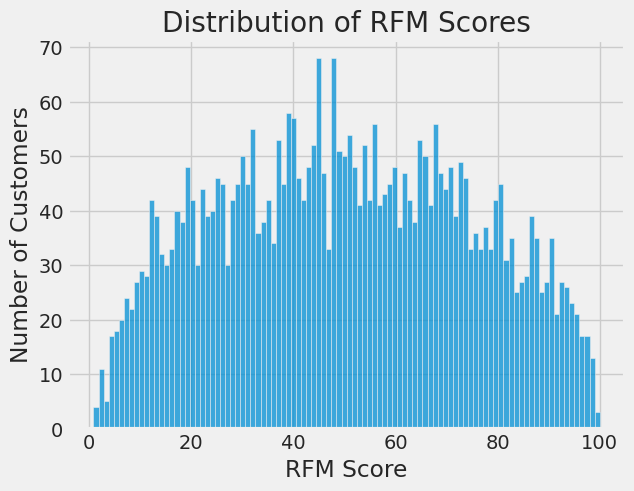

In [175]:
# Compute RFM with your choice of buckets and weights
rfm_2011_clean['R_rank'] = rfm_2011_clean['Recency'].rank(ascending=False)
rfm_2011_clean['F_rank'] = rfm_2011_clean['Frequency'].rank(ascending=True)
rfm_2011_clean['M_rank'] = rfm_2011_clean['Monetary'].rank(ascending=True)

# Normalizing the rank of the customers
rfm_2011_clean['R_rank_norm'] = (rfm_2011_clean['R_rank'] / rfm_2011_clean['R_rank'].max()) * 100
rfm_2011_clean['F_rank_norm'] = (rfm_2011_clean['F_rank'] / rfm_2011_clean['F_rank'].max()) * 100
rfm_2011_clean['M_rank_norm'] = (rfm_2011_clean['M_rank'] / rfm_2011_clean['M_rank'].max()) * 100

# Drop temporary rank columns
rfm_2011_clean.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

# Define weights for RFM score
RECENCY_WEIGHT = 0.5
FREQUENCY_WEIGHT = 0.25
MONETARY_WEIGHT = 0.25

# Calculate RFM score
rfm_2011_clean['RFMScore'] = (
    RECENCY_WEIGHT * rfm_2011_clean['R_rank_norm'] +
    FREQUENCY_WEIGHT * rfm_2011_clean['F_rank_norm'] +
    MONETARY_WEIGHT * rfm_2011_clean['M_rank_norm']
)

# Plot distribution of RFM scores
plt.figure()
plt.style.use('fivethirtyeight')
sns.histplot(rfm_2011_clean, x='RFMScore', bins=100)
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.title('Distribution of RFM Scores')
plt.show()

In [176]:
# Inspect the RFM scores
rfm_2011_clean[['RFMScore']].describe(percentiles=[.01, .1, .25, .5, .75, .90, .95, .99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
RFMScore,3769.0,50.093138,24.577304,0.859257,4.898091,16.61026,30.218782,49.593295,69.653534,84.354143,90.409799,96.693866,99.966835


Distribution of RFM Scores:

The histogram displays the distribution of RFM scores for the customers:

- The RFM scores range from approximately 4.89 to 99.78.
- The distribution is somewhat normal, with a higher concentration of customers scoring between 30 and 70.
- The mean RFM score is 49.59, indicating the average customer falls in the middle range of the RFM score spectrum.
- The standard deviation is 24.57, showing a moderate spread around the mean.

- Analysis Time Period:
- Country: United Kingdom
- Consider Customers with at least 1 purchase in 1 year.

In [177]:
# Compute RFM with your choice of buckets and weights
rfm_2011_clean['R_rank'] = rfm_2011_clean['Recency'].rank(ascending=False)
rfm_2011_clean['F_rank'] = rfm_2011_clean['Frequency'].rank(ascending=True)
rfm_2011_clean['M_rank'] = rfm_2011_clean['Monetary'].rank(ascending=True)

# Normalizing the rank of the customers
rfm_2011_clean['R_rank_norm'] = (rfm_2011_clean['R_rank'] / rfm_2011_clean['R_rank'].max()) * 100
rfm_2011_clean['F_rank_norm'] = (rfm_2011_clean['F_rank'] / rfm_2011_clean['F_rank'].max()) * 100
rfm_2011_clean['M_rank_norm'] = (rfm_2011_clean['M_rank'] / rfm_2011_clean['M_rank'].max()) * 100

# Drop temporary rank columns
rfm_2011_clean.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

# Define weights for RFM score
RECENCY_WEIGHT = 0.5
FREQUENCY_WEIGHT = 0.25
MONETARY_WEIGHT = 0.25

# Calculate RFM score
rfm_2011_clean['RFMScore'] = (
    RECENCY_WEIGHT * rfm_2011_clean['R_rank_norm'] +
    FREQUENCY_WEIGHT * rfm_2011_clean['F_rank_norm'] +
    MONETARY_WEIGHT * rfm_2011_clean['M_rank_norm']
)

# Display the top rows to verify the results
rfm_2011_clean.head()

,Customer ID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFMScore
0,12747.0,24,86,3458.84,96.020761,72.326877,92.040329,89.102182
1,12748.0,22,3869,24890.30,100.000000,99.946936,99.655081,99.900504
2,12749.0,25,197,4010.98,93.851477,90.368798,93.950650,93.005601
3,12820.0,25,59,942.34,93.851477,61.660918,64.287609,78.412870
4,12821.0,236,6,92.72,13.095555,7.813744,3.847174,9.463007


In [178]:
rfm_2011_clean[['RFMScore']].describe(percentiles=[.01,.1,.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
RFMScore,3769.0,50.093138,24.577304,0.859257,4.898091,16.61026,30.218782,49.593295,69.653534,84.354143,90.409799,96.693866,99.966835


/home/andrea/anaconda3/envs/AI-Comm-Mark/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


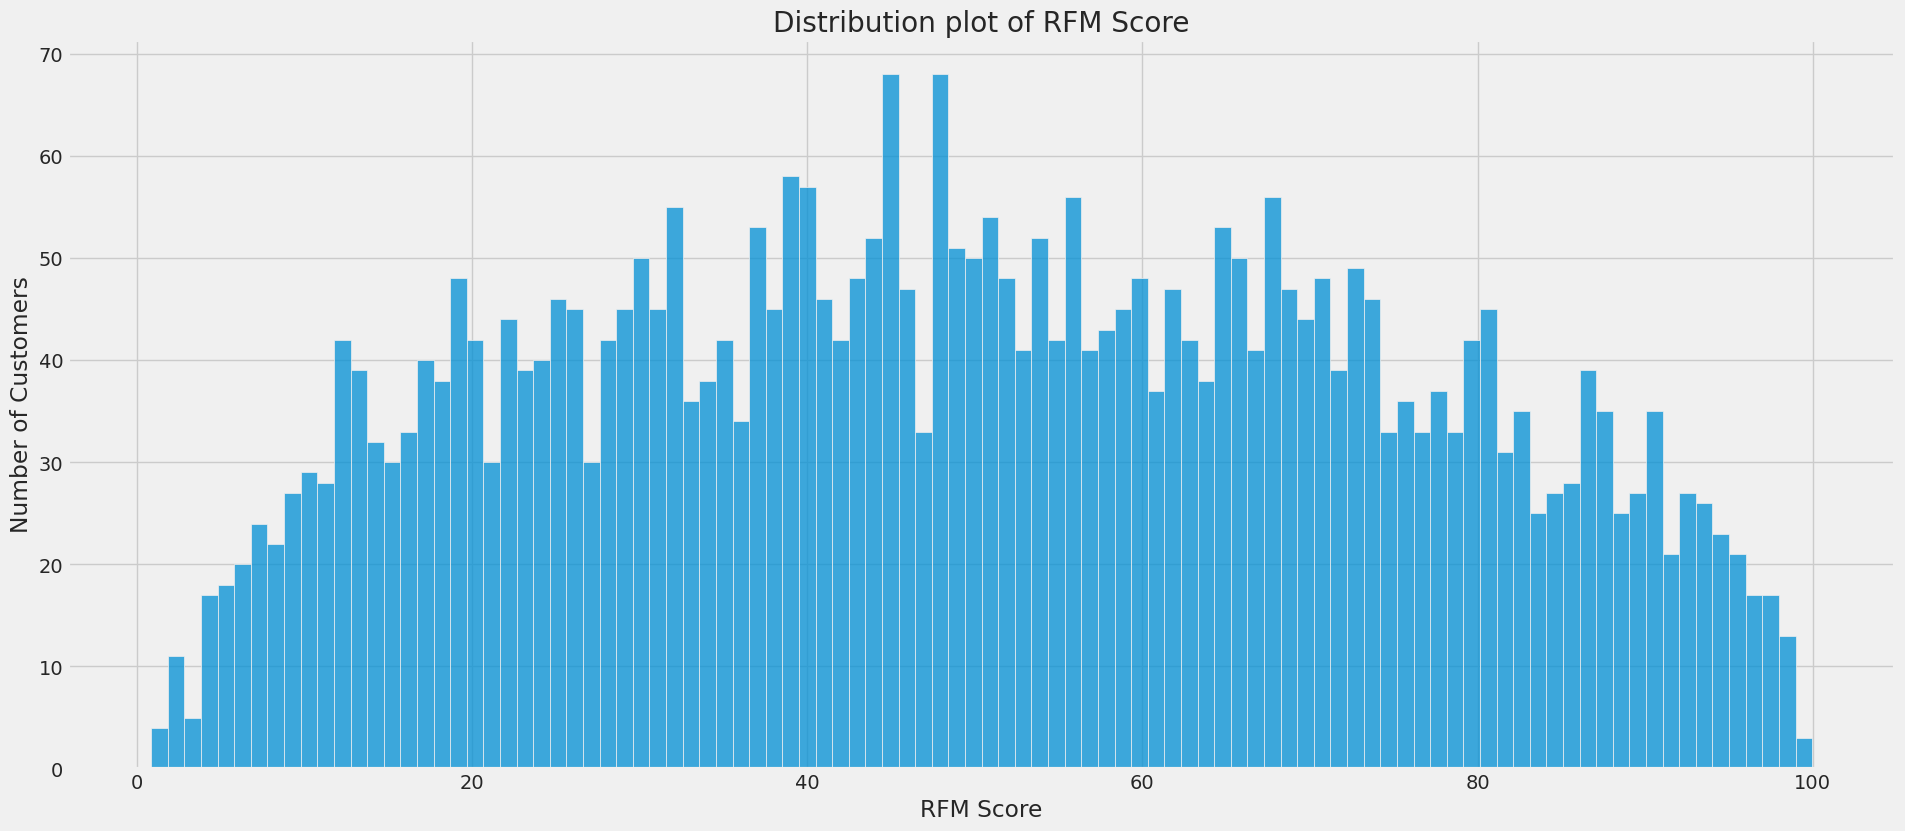

In [179]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.histplot(rfm_2011_clean, x='RFMScore', bins=100)
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.title('Distribution plot of RFM Score')
plt.show()

In [180]:
rfm_2011_clean["RFMSegment"] = np.where(
    rfm_2011_clean['RFMScore'] > 85, "4. Elite Customer", 
        np.where(rfm_2011_clean['RFMScore'] > 70, "3. High value Customer",
            np.where(rfm_2011_clean['RFMScore'] > 30, "2. Medium value Customer", "1. Low value Customer")))

/home/andrea/anaconda3/envs/AI-Comm-Mark/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


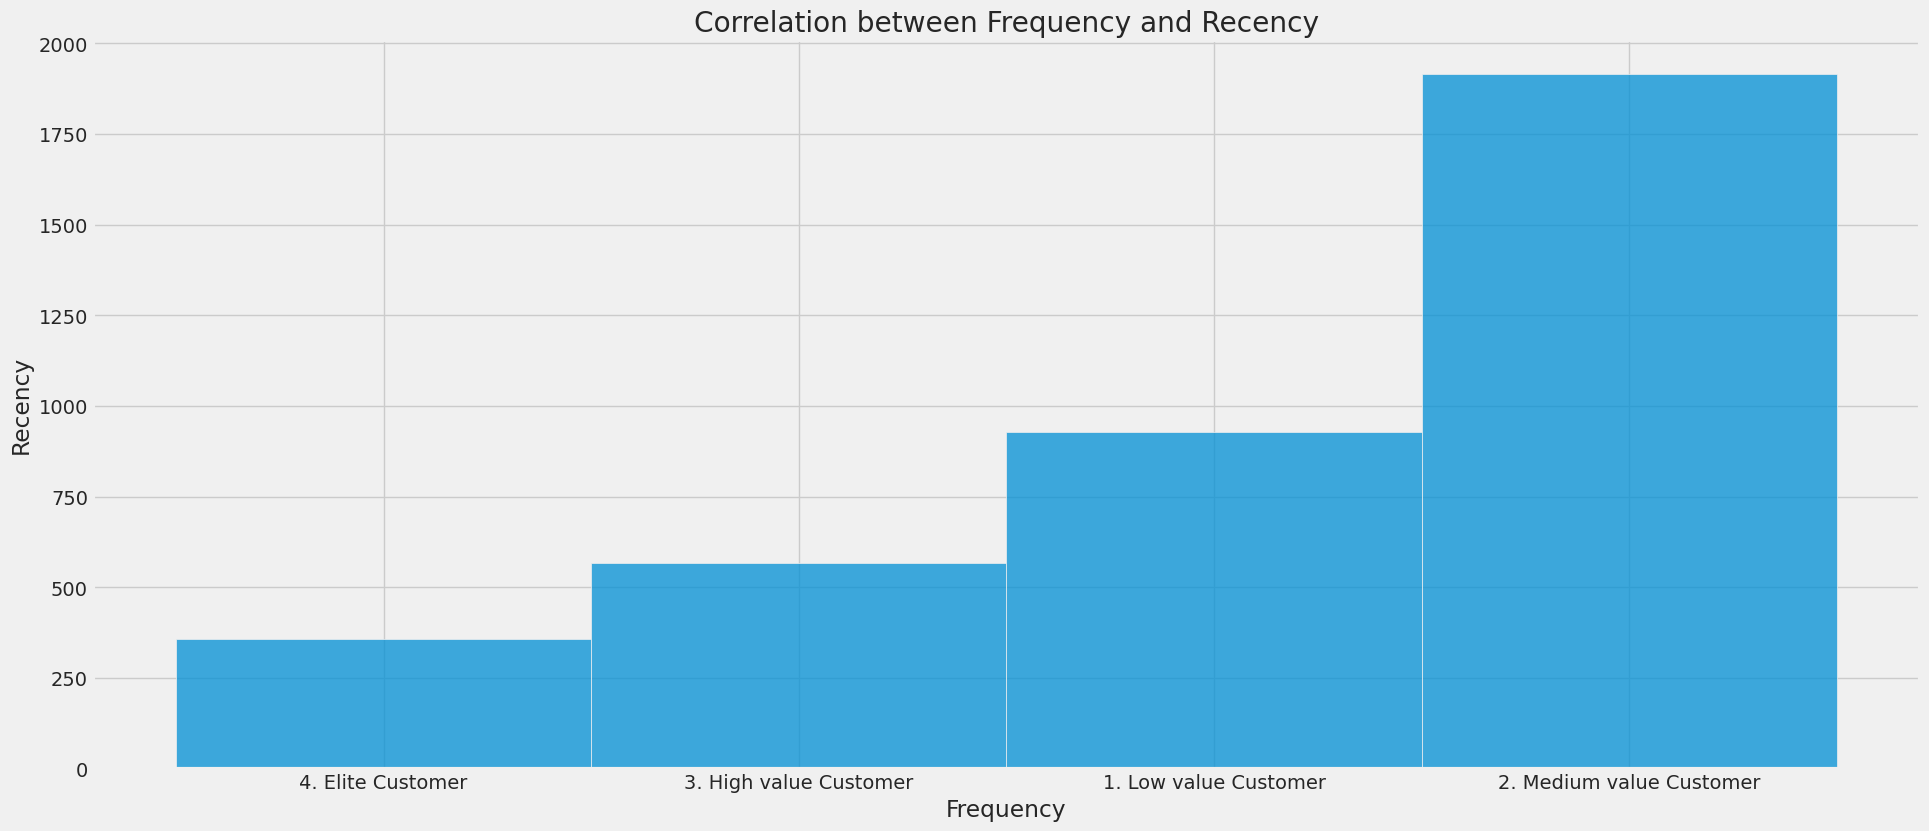

In [181]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.histplot(x='RFMSegment', data=rfm_2011_clean)
plt.xlabel('Frequency')
plt.ylabel('Recency')
plt.title('Correlation between Frequency and Recency')
plt.show()

In [182]:
rfm_2011_clean.groupby("RFMSegment")['Customer ID'].count()

RFMSegment
1. Low value Customer        929
2. Medium value Customer    1915
3. High value Customer       567
4. Elite Customer            358
Name: Customer ID, dtype: int64

In [183]:
(
    rfm_2011_clean
    .groupby("RFMSegment")
    .agg(
        avg_recency=("Recency", "mean")
        , avg_frequency=("Frequency", "mean")
        , avg_monetary=("Monetary", "mean")
    )
)

,avg_recency,avg_frequency,avg_monetary
RFMSegment,,,
1. Low value Customer,225.898816,14.663079,240.835350
2. Medium value Customer,83.161358,52.946214,810.969610
3. High value Customer,37.714286,139.587302,2177.829965
4. Elite Customer,26.927374,363.986034,6176.895810


In [184]:
# Step 1: Extract Elite Customer IDs
elite_customer_ids = rfm_2011_clean.loc[rfm_2011_clean['RFMSegment'] == '4. Elite Customer', 'Customer ID']

# Step 2: Filter df_clean using the extracted Customer IDs
df_elite_customers_orders = df_2011_clean[df_2011_clean['Customer ID'].isin(elite_customer_ids)]

# Step 3: Display the filtered DataFrame
display(df_elite_customers_orders)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
567966,540001,21733,RED HANGING HEART T-LIGHT HOLDER,32,2011-01-04 10:22:00,2.55,18097.0,United Kingdom,81.60
567967,540001,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,24,2011-01-04 10:22:00,2.95,18097.0,United Kingdom,70.80
567968,540001,22060,LARGE CAKE STAND HANGING HEARTS,6,2011-01-04 10:22:00,9.95,18097.0,United Kingdom,59.70
567969,540001,22151,PLACE SETTING WHITE HEART,48,2011-01-04 10:22:00,0.42,18097.0,United Kingdom,20.16
567970,540001,22508,DOORSTOP RETROSPOT HEART,16,2011-01-04 10:22:00,3.39,18097.0,United Kingdom,54.24
...,...,...,...,...,...,...,...,...,...
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


In [185]:
# Additional analysis: Aggregate and sort the top 10 products by quantity for elite customers
top_products = df_elite_customers_orders.groupby('Description').agg(Quantity=('Quantity', 'sum')).sort_values('Quantity', ascending=False).head(10)

display(top_products)

,Quantity
Description,
JUMBO BAG RED RETROSPOT,12360
POPCORN HOLDER,8030
WHITE HANGING HEART T-LIGHT HOLDER,7894
VICTORIAN GLASS HANGING T-LIGHT,7487
ASSORTED COLOUR BIRD ORNAMENT,6800
LUNCH BAG RED RETROSPOT,6753
JUMBO BAG PINK POLKADOT,6174
PARTY BUNTING,5272
WORLD WAR 2 GLIDERS ASSTD DESIGNS,5111


In [186]:
# Step 1: Extract Elite Customer IDs
elite_customer_ids = rfm_2011_clean.loc[rfm_2011_clean['RFMSegment'] == '1. Low value Customer', 'Customer ID']

# Step 2: Filter df_clean using the extracted Customer IDs
df_elite_customers_orders = df_2011_clean[df_2011_clean['Customer ID'].isin(elite_customer_ids)]

# Additional analysis: Aggregate and sort the top 10 products by quantity for low value customers
top_products = df_elite_customers_orders.groupby('Description').agg(Quantity=('Quantity', 'sum')).sort_values('Quantity', ascending=False).head(10)

display(top_products) 

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,1547
WORLD WAR 2 GLIDERS ASSTD DESIGNS,1104
PARTY BUNTING,982
VICTORIAN GLASS HANGING T-LIGHT,919
JUMBO BAG RED RETROSPOT,877
HEART OF WICKER SMALL,759
ANTIQUE SILVER T-LIGHT GLASS,722
PACK OF 72 RETROSPOT CAKE CASES,698
ASSORTED COLOUR BIRD ORNAMENT,690
